
# Onglet Heston — Notebook de calcul

Ce notebook reproduit les calculs principaux de l'onglet Heston de l'app Streamlit :
- définition des paramètres Heston
- pricing via Carr–Madan
- visualisation K×T (heatmap prix) et surface 3D des prix

Tu peux ajuster les paramètres et relancer les cellules.


In [6]:
from pathlib import Path
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Rendre les scripts accessibles (Notebook/CLI)
try:
    repo_root = Path(__file__).resolve().parents[3]
except NameError:
    cwd = Path.cwd().resolve()
    candidate = None
    for parent in [cwd] + list(cwd.parents):
        if (parent / '.git').exists():
            candidate = parent
            break
    repo_root = candidate if candidate else cwd

sys.path.insert(0, str(repo_root / "notebooks" / "scripts"))
sys.path.insert(0, str(repo_root / "scripts" / "scriptsGPT" / "pricing_scripts"))
from pricing import price_heston_carr_madan  # noqa: E402


In [7]:

# Paramètres Heston (exemple après calibration)
params = {
    "S0": 40.55,
    "r": 0.02,
    "q": 0.0,
    "kappa": 2.0,
    "theta": 0.04,
    "sigma": 0.5,
    "rho": -0.7,
    "v0": 0.04,
}

# Grilles K × T
K_center = 41.0
T_center = 0.31
span_K = 20.0
span_T = 0.4
n_K = 21
n_T = 15

K_vals = np.linspace(max(0.1, K_center - span_K), K_center + span_K, n_K)
T_vals = np.linspace(max(0.05, T_center - span_T), T_center + span_T, n_T)


In [8]:

# Calcul de la grille de prix (call/put via option_type)
option_type = "c"  # "c" pour call, "p" pour put
price_grid = np.zeros((len(T_vals), len(K_vals)))
for i_t, T in enumerate(T_vals):
    for j_k, K in enumerate(K_vals):
        price_grid[i_t, j_k] = price_heston_carr_madan(
            S0=params["S0"],
            K=K,
            T=T,
            r=params["r"],
            q=params["q"],
            kappa=params["kappa"],
            theta=params["theta"],
            sigma=params["sigma"],
            rho=params["rho"],
            v0=params["v0"],
            option_type=option_type,
        )
price_grid


array([[ 1.95709894e+01,  1.75729884e+01,  1.55749874e+01,
         1.35769864e+01,  1.15789856e+01,  9.58099188e+00,
         7.58316519e+00,  5.58793481e+00,  3.61839957e+00,
         1.80414494e+00,  5.17285942e-01,  4.78907551e-02,
         8.54488502e-04,  3.60777016e-06, -8.09975515e-08,
        -8.80161506e-08, -8.80256856e-08, -8.80256829e-08,
        -8.80256691e-08, -8.80256551e-08, -8.80256407e-08],
       [ 1.95907603e+01,  1.75946423e+01,  1.55985254e+01,
         1.36024209e+01,  1.16064278e+01,  9.61121804e+00,
         7.62039948e+00,  5.64947166e+00,  3.75037051e+00,
         2.05477265e+00,  7.95439424e-01,  1.64001844e-01,
         1.44339417e-02,  6.42665686e-04,  1.97269868e-05,
         4.34735316e-07, -7.53987593e-08, -8.77137729e-08,
        -8.80177662e-08, -8.80254403e-08, -8.80256357e-08],
       [ 1.96105134e+01,  1.76162834e+01,  1.56220945e+01,
         1.36281297e+01,  1.16351927e+01,  9.64626004e+00,
         7.67071988e+00,  5.73410485e+00,  3.89498086e

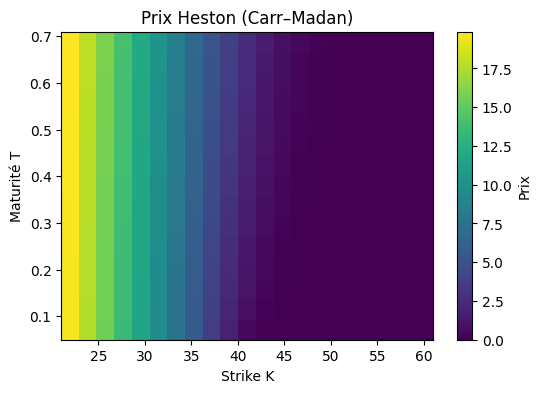

In [9]:

# Heatmap des prix Heston (K × T)
fig, ax = plt.subplots(figsize=(6, 4))
img = ax.imshow(
    price_grid,
    origin="lower",
    aspect="auto",
    extent=[K_vals[0], K_vals[-1], T_vals[0], T_vals[-1]],
    cmap="viridis",
)
ax.set_xlabel("Strike K")
ax.set_ylabel("Maturité T")
ax.set_title("Prix Heston (Carr–Madan)")
fig.colorbar(img, ax=ax, label="Prix")
plt.show()


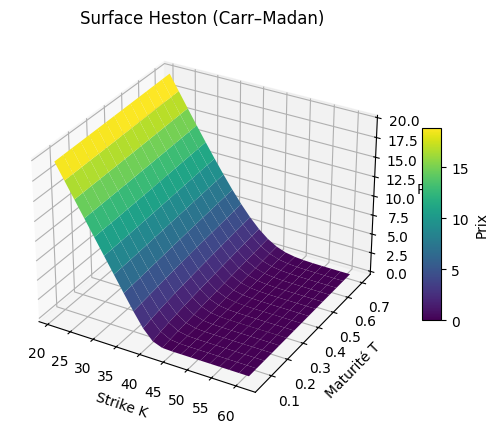

In [10]:

# Surface 3D des prix Heston
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

K_mesh, T_mesh = np.meshgrid(K_vals, T_vals)
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(K_mesh, T_mesh, price_grid, cmap=cm.viridis, linewidth=0, antialiased=True)
ax.set_xlabel("Strike K")
ax.set_ylabel("Maturité T")
ax.set_zlabel("Prix")
ax.set_title("Surface Heston (Carr–Madan)")
fig.colorbar(surf, shrink=0.5, aspect=10, label="Prix")
plt.show()
